In [201]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data = pd.read_csv('USA Housing Dataset.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>RangeIndex: 4140 entries, 0 to 4139Data columns (total 18 columns): #   Column         Non-Null Count  Dtype  ---  ------         --------------  -----   0   date           4140 non-null   object  1   price          4140 non-null   float64 2   bedrooms       4140 non-null   float64 3   bathrooms      4140 non-null   float64 4   sqft_living    4140 non-null   int64   5   sqft_lot       4140 non-null   int64   6   floors         4140 non-null   float64 7   waterfront     4140 non-null   int64   8   view           4140 non-null   int64   9   condition      4140 non-null   int64   10  sqft_above     4140 non-null   int64   11  sqft_basement  4140 non-null   int64   12  yr_built       4140 non-null   int64   13  yr_renovated   4140 non-null   int64   14  street         4140 non-null   object  15  city           4140 non-null   object  16  statezip       4140 non-null   object  17  country        4140 non-null   object dtypes: float64(4), int64(9), object

- There are zero null values, so data is clean

In [204]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


- As range of values of features varies, need of standardization

In [6]:
data.city.value_counts().nunique()

34

In [44]:
data.isna().sum()

price                   0bedrooms                0bathrooms               0sqft_living             0sqft_lot                0floors                  0waterfront              0view                    0condition               0sqft_above              0sqft_basement           0yr_built                0yr_renovated            0city                    0sqft_living_log         0sqft_above_log          0sqft_basement_log       0city_trans           4103dtype: int64

In [205]:
# Droping irrelavant features
drop_cols = ['date','street',  'statezip', 'country']
data = data.drop(columns=drop_cols)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,Issaquah
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle


In [206]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['city']= lb.fit_transform(data['city'])

In [207]:
correlation_matrix = data.corr()
price_correlation = correlation_matrix['price']
price_correlation

price            1.000000bedrooms         0.188765bathrooms        0.317785sqft_living      0.418528sqft_lot         0.045964floors           0.143180waterfront       0.131401view             0.217553condition        0.030327sqft_above       0.355214sqft_basement    0.204066yr_built         0.027067yr_renovated    -0.028272city             0.008999Name: price, dtype: float64

- Will drop columns having less than 0.1 corelation

<Axes: >

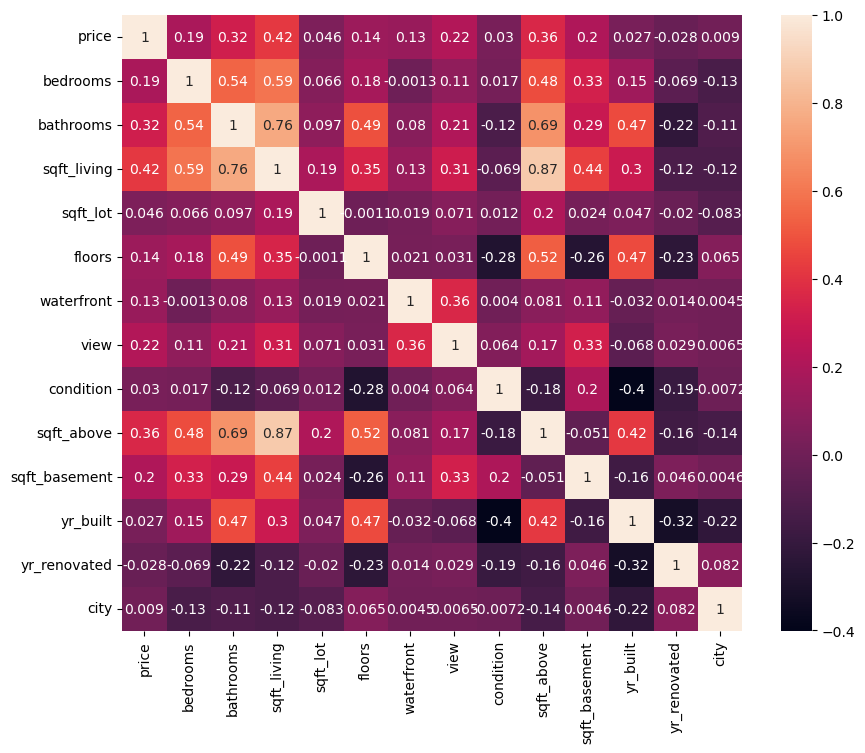

In [208]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True)

- Selecting efficient features

In [209]:
# Example of IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['price'] < (Q1 - 1.5 * IQR)) | 
                                (data['price'] > (Q3 + 1.5 * IQR))]
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,15
11,1.225000e+06,4.0,4.50,5420,101930,1.0,0,0,3,3890,1530,2001,0,30
18,1.200000e+06,3.0,1.75,1560,8078,1.5,1,4,4,1560,0,1928,0,22
22,1.575000e+06,5.0,2.75,3650,20150,1.0,0,0,4,2360,1290,1975,0,3
28,1.315000e+06,4.0,3.50,3460,3997,2.0,0,0,3,2560,900,2004,2003,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,2.199900e+06,4.0,1.50,1120,5427,1.0,0,0,3,1120,0,1969,2014,9
3890,2.659000e+07,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,17
4005,2.560498e+06,3.0,2.50,1710,1664,2.0,0,0,5,1300,410,2003,0,34
4007,1.337044e+06,4.0,3.50,4280,9583,2.0,0,0,3,4280,0,2005,0,3


In [210]:
# Removing outliers from the dataset
data_no_outliers =data[~((data['price'] < (Q1 - 1.5 * IQR)) | 
                                                  (data['price'] > (Q3 + 1.5 * IQR)))]

In [211]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 
            'bedrooms', 'floors', 'waterfront', 'city']
for i in features:
    lower_bound = data[i].quantile(0.01)
    upper_bound = data[i].quantile(0.99)
    data[i] = data[i].clip(lower_bound, upper_bound)

In [ ]:
# managing outliers
lower_bound = data['price'].quantile(0.01)
upper_bound = data['price'].quantile(0.99)
data['price'] = data['price'].clip(lower_bound, upper_bound)

lower_bound = data['city'].quantile(0.01)
upper_bound = data['city'].quantile(0.99)
data['city'] = data['city'].clip(lower_bound, upper_bound)
data['city'].value_counts().max()

lower_bound = data['sqft_living'].quantile(0.01)
upper_bound = data['sqft_living'].quantile(0.99)
data['sqft_living'] = data['sqft_living'].clip(lower_bound, upper_bound)

lower_bound = data['sqft_above'].quantile(0.01)
upper_bound = data['sqft_above'].quantile(0.99)
data['sqft_above'] = data['sqft_above'].clip(lower_bound, upper_bound)

In [74]:
import numpy as np

# Apply log transformation to skewed features
data['sqft_living_log'] = np.log1p(data['sqft_living'])  # log1p to handle zero values
#data['price_log'] = np.log1p(data['price'])
data['sqft_above_log'] = np.log1p(data['sqft_above'])
data['sqft_basement_log'] = np.log1p(data['sqft_basement'])
#data['city_trans']= data['city'].value_counts(ascending=True)

In [212]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 
            'bedrooms', 'floors', 'city', 'waterfront']
X = data_no_outliers[features]
y = data_no_outliers['price']

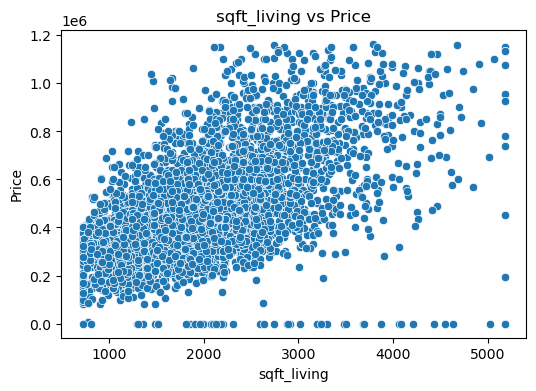

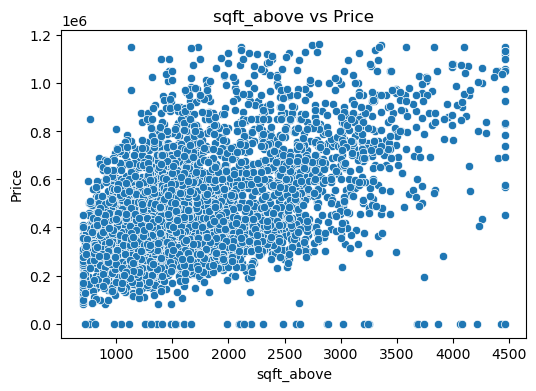

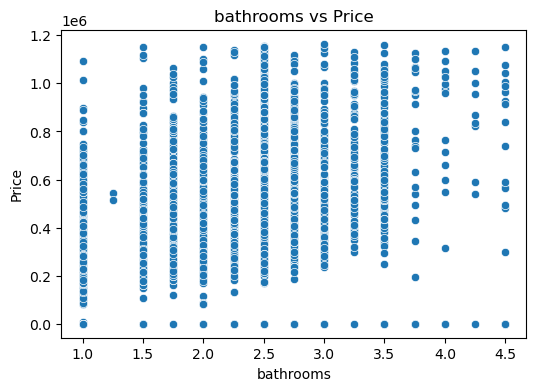

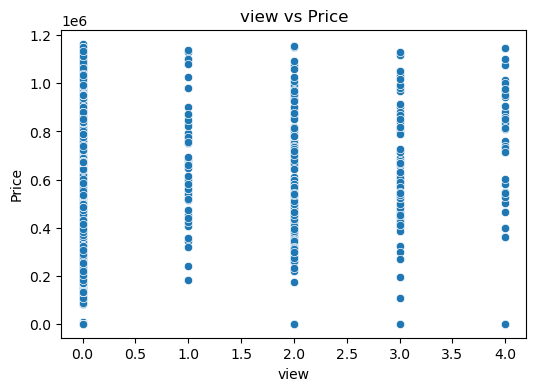

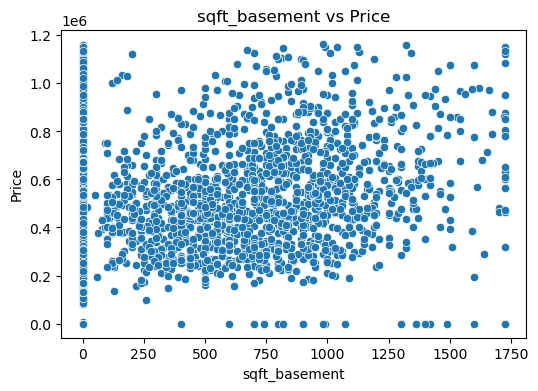

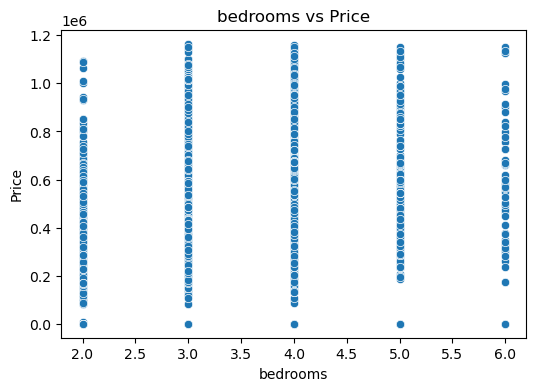

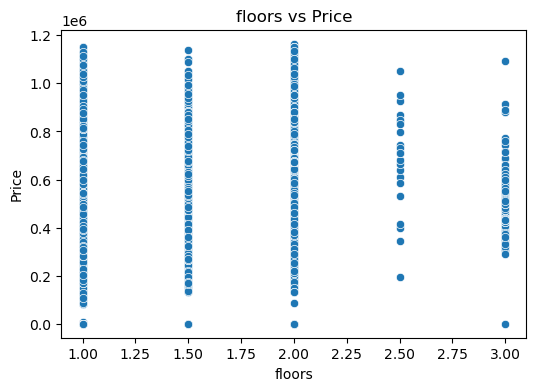

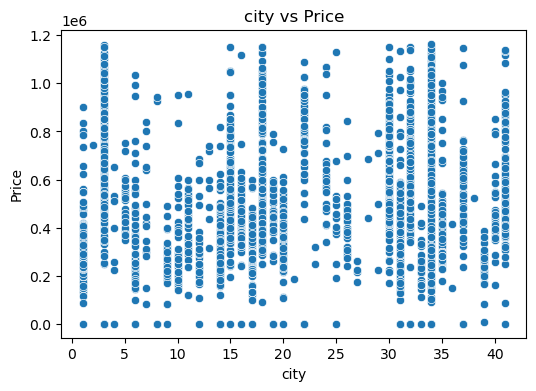

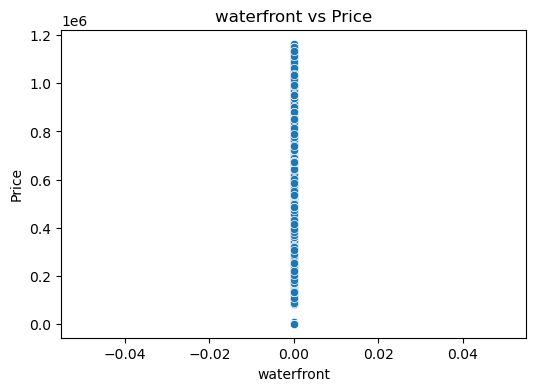

In [213]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=y)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [216]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
linear_model = LinearRegression()

In [218]:
# Train Linear Regression model
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse*0.000001, linear_r2*100

(33374.89986132233, 36.75489757437952)

In [219]:
svr_model = SVR(kernel='linear')

In [220]:
# Train SVR model
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse*0.000001, svr_r2*100

(52534.05302719276, 0.4484933784564382)

In [232]:
knn_model = KNeighborsRegressor(n_neighbors=15)

In [233]:
# Train KNN Regressor model
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse*0.000001, knn_r2*100

(31384.92967685374, 40.52587123013869)

In [200]:
print('Linear Regression: mse- ', linear_mse*0.000001,', R2 score- ', linear_r2*100)
print('SVM Regression: mse- ', svr_mse*0.000001,', R2 score- ', svr_r2*100)
print('KNN Regression: mse- ', knn_mse*0.000001,', R2 score- ', knn_r2*100)
print('DecisioinTree Regression: mse- ', dt_mse*0.000001,', R2 score- ', dt_r2*100)
print('RandomForest Regression: mse- ', rf_mse*0.000001,', R2 score- ', rf_r2*100)

Linear Regression: mse-  53436.000516548294 , R2 score-  53.45145439265748SVM Regression: mse-  119566.19130668388 , R2 score-  -4.155106208067072KNN Regression: mse-  55110.08999721206 , R2 score-  51.9931410872424DecisioinTree Regression: mse-  94420.37752528724 , R2 score-  17.74962184646981RandomForest Regression: mse-  45882.06579188378 , R2 score-  60.0317499171521

## Conclusion
- The Linear Regression model performs best among the three, with the lowest MSE and good R2 score.

In [224]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse*0.000001, dt_r2*100

(35051.87808107273, 33.577040570632796)

In [225]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse*0.000001, rf_r2*100

(20901.42450569907, 60.39200898887921)